
## Практическая работа 2. Библиотека NumPy



# 1.  Cправка. 🔹 Изображение как многомерный массив в NumPy

Когда вы загружаете цветное изображение (например, `наименование.jpg`) в NumPy — оно представляется как **трёхмерный массив**:

```python
img = np.array(Image.open('photo.jpg'))  # или через imageio
print(img.shape)  # → (высота, ширина, 3)
```

Например:
```python
(600, 800, 3)
```
- `600` — высота изображения в пикселях,
- `800` — ширина изображения в пикселях,
- `3` — количество **цветовых каналов** (слоев).

---

### 🔹 Что такое "слои" (каналы)?

Каждый пиксель в цветном изображении представлен **тремя числами** — это **красный (R), зелёный (G), синий (B)** компоненты.  
Это называется **RGB-модель цвета**.

> 💡 Каждое число — интенсивность цвета от 0 до 255:
> - `0` — нет цвета,
> - `255` — максимальная яркость.

Пример пикселя:
```python
[255, 128, 0]  → красный=максимум, зелёный=половина, синий=отсутствует → оранжевый
```

---

### 🔹 Почему именно 3 слоя?

Потому что **человеческий глаз видит три основных цвета**: красный, зелёный и синий.  
Любой цвет можно получить, смешав эти три в разных пропорциях — это **аддитивная цветовая модель**.

> 🎨 Это работает так же, как на экранах монитора, телефона или телевизора — каждый пиксель состоит из трёх точек (subpixels): R, G, B.

---

### 🔹 Как выглядит массив?

Для изображения `600×800`:

- У нас есть `600 × 800 = 480 000` пикселей.
- Каждый пиксель — это список из 3 чисел: `[R, G, B]`.
- Всего — массив размером `(600, 800, 3)`.

Визуально можно представить как:

```
[ [ [255, 0, 0], [255, 0, 0], ... ]   ← строка 0
  [ [0, 255, 0], [0, 255, 0], ... ]   ← строка 1
  ...
]
```

→ Это значит: первый пиксель — чисто красный, второй — тоже красный, третий — зелёный и т.д.

---

### 🔹 Как извлечь отдельные слои?

Вы можете взять только один канал:

```python
red_channel = img[:, :, 0]    # только красный канал
green_channel = img[:, :, 1]  # только зелёный
blue_channel = img[:, :, 2]   # только синий
```

Или создать изображение только из одного канала:

```python
img_red_only = img.copy()
img_red_only[:, :, 1] = 0  # обнуляем зелёный
img_red_only[:, :, 2] = 0  # обнуляем синий
plt.imshow(img_red_only)
```

→ Получится изображение, где видны только красные тона.
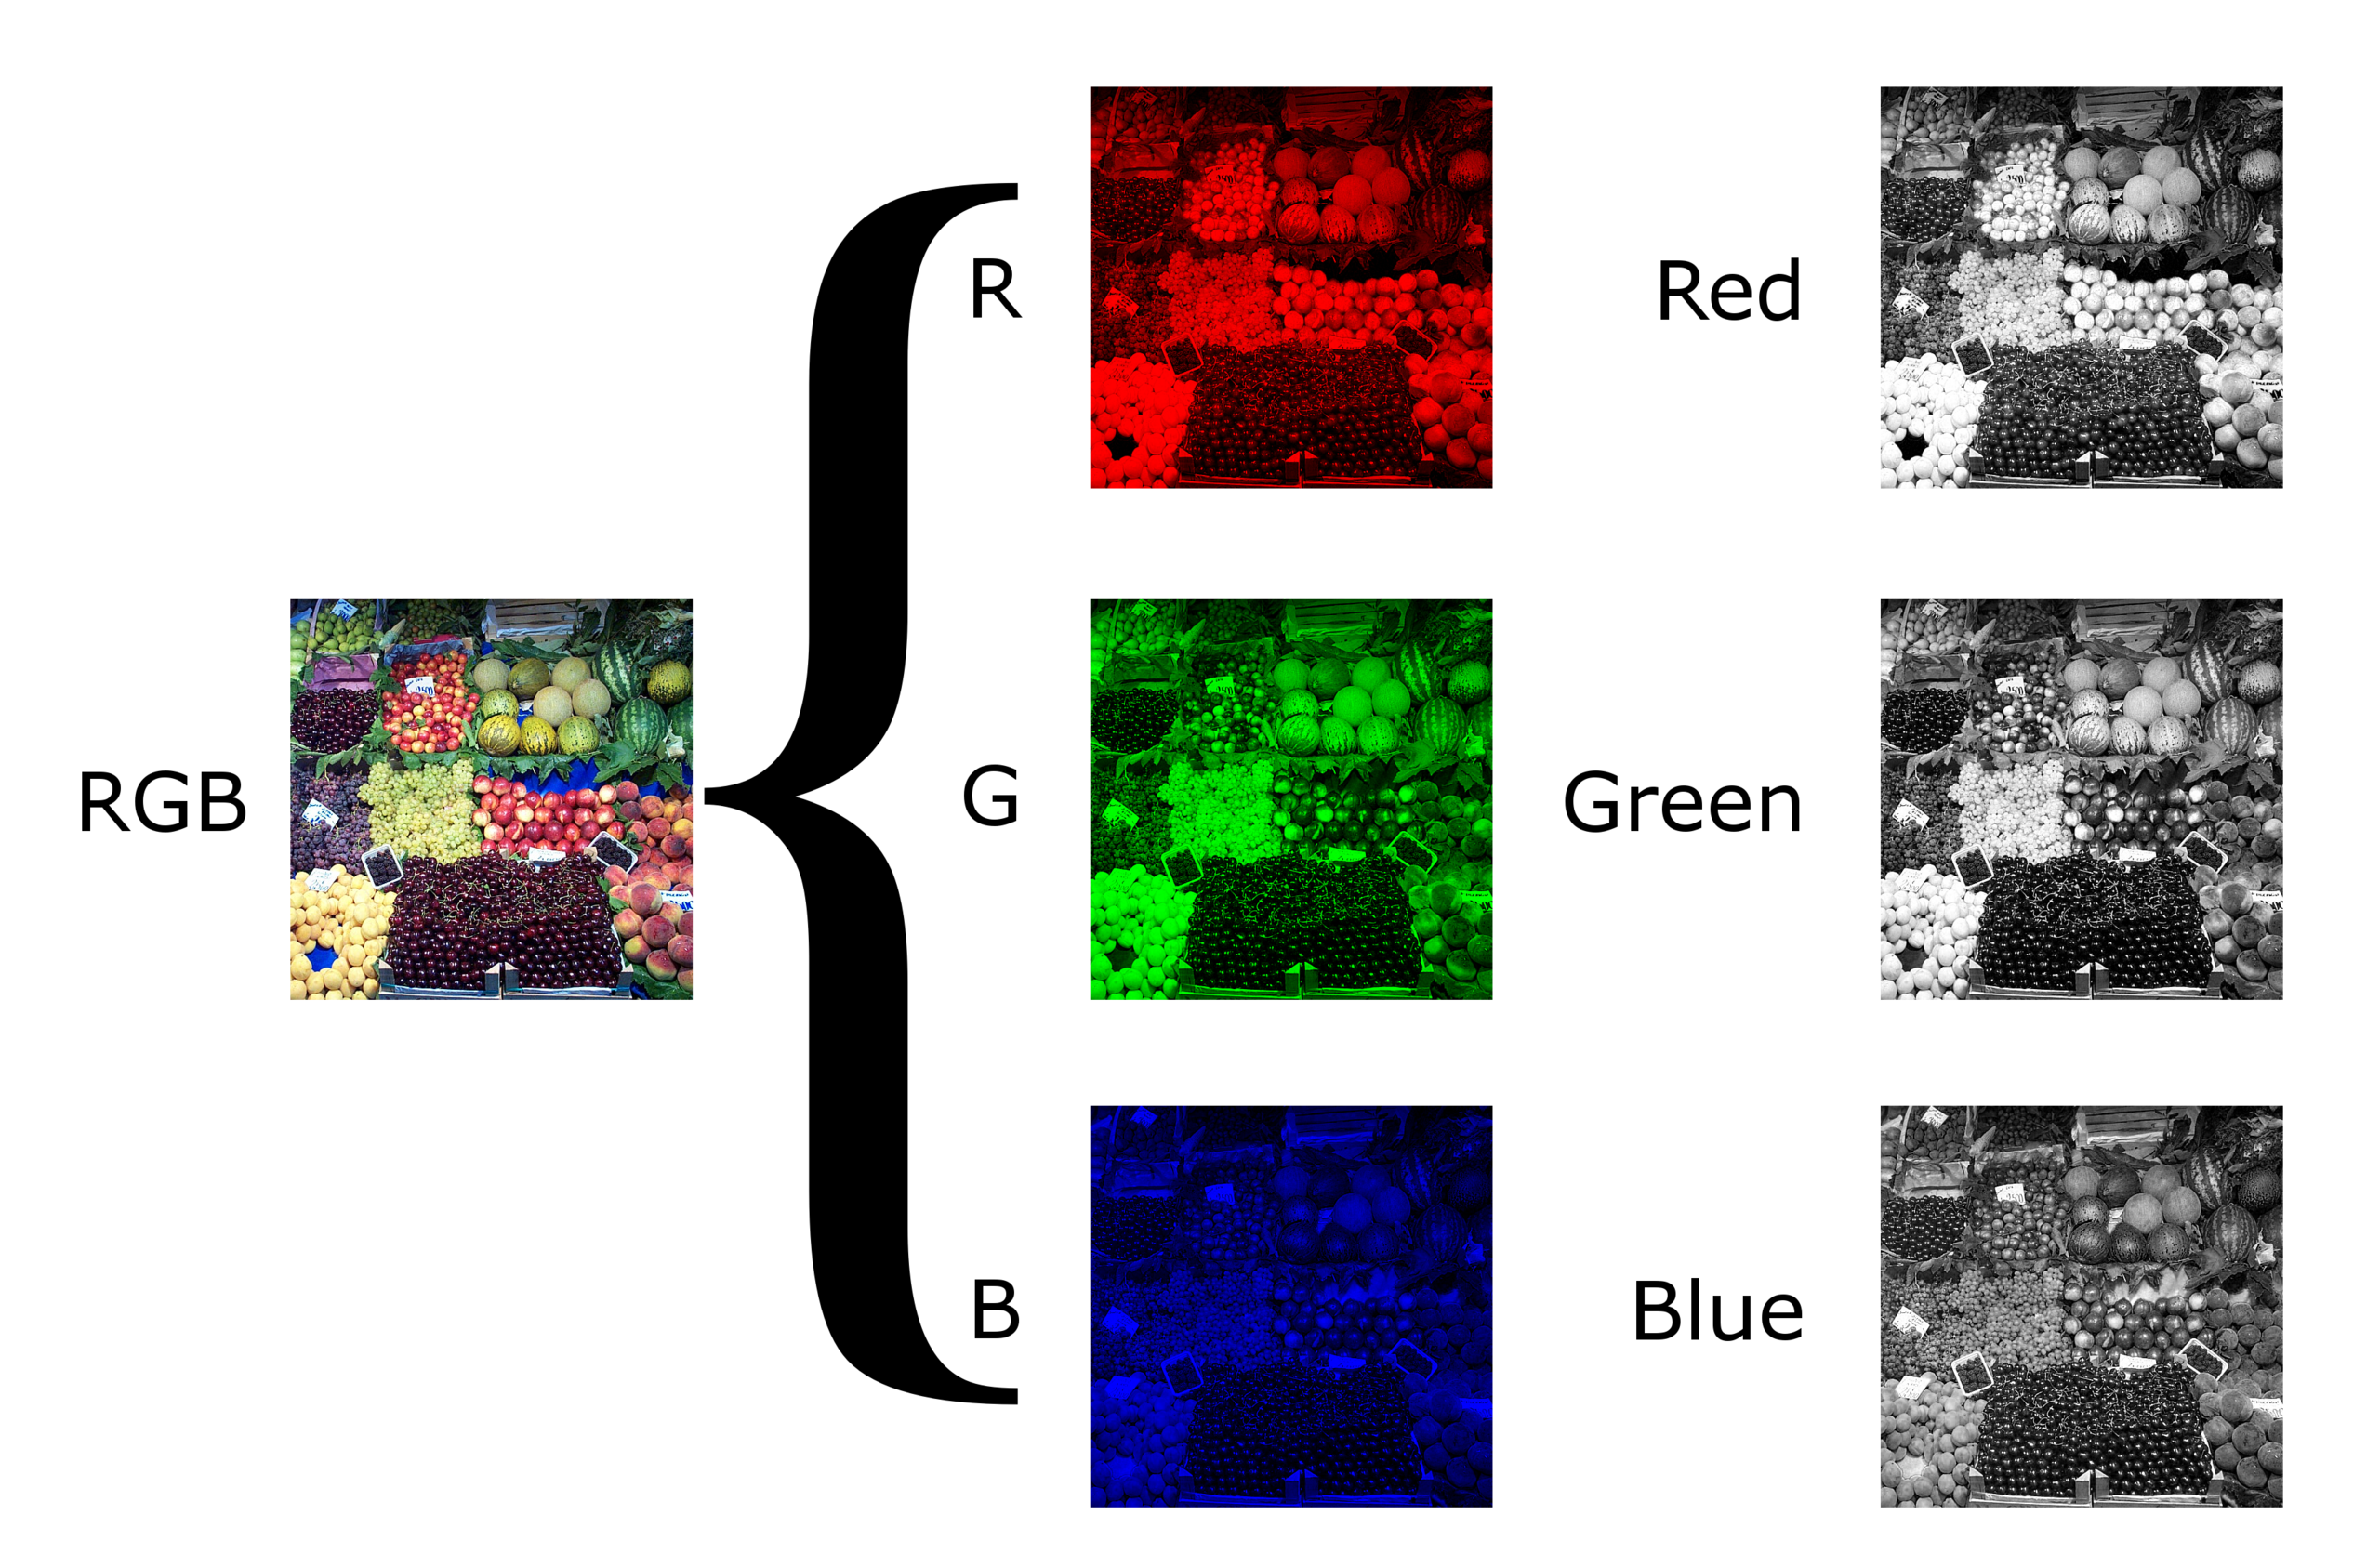
---

### 🔹 Чёрно-белые изображения

Если у вас чёрно-белое изображение — его форма будет `(высота, ширина)` — без третьего измерения.  
Один пиксель — одно число (яркость от 0 до 255).

---


 # 🎓 Задание: «Работа с изображением как с NumPy-массивом»

> **Цель**: Отработать ключевые операции NumPy — срезы, слои, broadcasting, транслирование — на реальном примере изображения.  
> **Ограничение**: Использовать `matplotlib.pyplot` только для команды `plt.imshow()` — чтобы показать результат.

---

## 📥1: Загрузите изображение

Используйте любое цветное изображение на свое усмотрение.  
Загрузите его в массив NumPy двуся способами с  `imageio` (рекомендовано) и  `PIL`.

```python
import numpy as np
import matplotlib.pyplot as plt

# Вариант 1: через imageio (рекомендуется)
import imageio.v3 as iio
img = iio.imread('photo.jpg')

# Вариант 2: через PIL
# from PIL import Image
# img = np.array(Image.open('photo.jpg'))

print("Форма изображения:", img.shape)  # прооверьте
```

---

## ✂️ 2: Срезы и слои (оси)

### Задание 2.1: Выведите отдельные цветовые каналы

- Создайте три новых массива: только красный канал, только зелёный, только синий.
- Покажите каждый канал как отдельное изображение (остальные каналы = 0).

```python
red_channel = img.copy()
red_channel[:, :, 1] = 0  # обнуляем зелёный
red_channel[:, :, 2] = 0  # обнуляем синий
plt.imshow(red_channel)
plt.title("Красный канал")
plt.show()
```

→ Сделайте то же для зелёного и синего.

---

## 🖼️  3: Работа с чёрно-белым изображением

### Задание 3.1: Преобразуйте цветное изображение в чёрно-белое

- Используйте формулу среднего весового:
  ```python
  gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
  ```
- Преобразуйте в тип `uint8` и покажите.

```python
gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
gray = gray.astype(np.uint8)
plt.imshow(gray, cmap='gray')
plt.title("Чёрно-белое изображение")
plt.show()
```

> 💡 Это соответствует стандартному алгоритму преобразования RGB → grayscale.

---

## 🧮  4: Сжатие (уменьшение разрешения)

### Задание 4.1: Уменьшите изображение в 2 раза по каждой оси

- Используйте срезы с шагом: `img[::2, ::2]`
- Это простейший способ "даунсэмплинга".

```python
small_img = img[::2, ::2]
plt.imshow(small_img)
plt.title("Изображение уменьшено в 2 раза")
plt.show()
```

---

## 🚫 5: Затирание (зануление) поля на изображении

### Задание 5.1: Затрите прямоугольную область на изображении

- Выберите координаты прямоугольника .
- Присвойте всем пикселям в этом участке значение `[0, 0, 0]` (чёрный).

```python


---

## 🔁 6: Перевороты изображения

### Задание 6.1: Горизонтальный переворот

- Используйте `np.flip()` и индексацию [:, ::-1]:

```python
flipped_horizontal = np.flip(img, axis=1)  # и img[:, ::-1]
plt.imshow(flipped_horizontal)
plt.title("Горизонтальный переворот")
plt.show()
```

### Задание 6.2: Вертикальный переворот

```python
flipped_vertical = np.flip(img, axis=0)  # и img[::-1, :]
plt.imshow(flipped_vertical)
plt.title("Вертикальный переворот")
plt.show()
```

### Задание 6.3: Полный поворот на 180°

```python
rotated_180 = np.flip(img, axis=0)  # сначала вертикально
rotated_180 = np.flip(rotated_180, axis=1)  # потом горизонтально
# Или просто: rotated_180 = np.flip(img, axis=(0, 1))
plt.imshow(rotated_180)
plt.title("Поворот на 180°")
plt.show()
```

---

## 🔄 7: Broadcasting — наложение маски / фильтра

### Задание 7.1: Сделайте изображение “теплее” — увеличьте красный канал на 50

- Создайте массив `filter = np.array([50, 0, 0])`.
- Сложите его с изображением: `img_warmer = img + filter`.
- Ограничьте значения от 0 до 255 с помощью np.clip.

Проведите собственные модификации фото: сделайте изображенее "холоднее",  увеличьте контрастность, измените яркость в обе стороны .
---

## 🎭  8: Транслирование — объединение с другим изображением

### Задание 8.1: Создайте градиентную маску и наложите её

- Создайте массив формы `(H, W, 1)` — например, линейный градиент по высоте.
- Смешайте исходное изображение с инвертированным, используя градиент как вес.

```python
H, W = img.shape[:2]
gradient = np.linspace(0, 1, H)[:, None, None]  # (H, 1, 1)

inverted = 255 - img
blended = (img * (1 - gradient) + inverted * gradient).astype(np.uint8)
plt.imshow(blended)
plt.title("Плавный переход: оригинал → инверсия")
plt.show()
```

---



# 🎓 Задание: «Реализация kNN — сравнение чистого Python и NumPy»

> **Цель**: Проанализировать разницу между поэлементными циклами и векторизованными операциями.  
> **Задача**: Реализовать алгоритм k ближайших соседей двумя способами — без библиотек и с NumPy — и сравнить время выполнения.

---

## 📌 Что такое kNN?

**k ближайших соседей (k-Nearest Neighbors)** — простой алгоритм классификации:  
> Чтобы классифицировать новый объект — найдите `k` ближайших к нему объектов из обучающей выборки и выберите самый частый класс среди них.

Расстояние обычно считают **евклидовым**:

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \dots}
$$

---

## 🧪 Шаг 1: Подготовьте данные

Создайте небольшой набор данных вручную:

```python
import numpy as np
import time

# Обучающая выборка: 1000 точек в 3D-пространстве
np.random.seed(42)
X_train = np.random.rand(1000, 3) * 100  # координаты от 0 до 100
y_train = np.random.choice(['A', 'B', 'C'], size=1000)  # метки классов

# Точка, которую нужно классифицировать
X_test = np.array([50.0, 50.0, 50.0])
k =   # количество соседей, попробуйте разные значения, сравните результаты
```

---

## ⚙️ Шаг 2: Реализация на чистом Python (без NumPy)

Напишите функцию `knn_pure_python`, которая:

- Принимает `X_train`, `y_train`, `X_test`, `k`.
- Для каждой точки в `X_train` вычисляет евклидово расстояние до `X_test` через цикл.
- Сортирует расстояния.
- Берёт `k` ближайших соседей.
- Возвращает самый частый класс.


> 💡 Не забудьте `.tolist()` — чтобы передать обычные списки, а не массивы NumPy.

---

## 🚀 Шаг 3: Реализация с NumPy

Напишите функцию `knn_numpy`, которая:

- Использует **векторизованные операции**.
- Вычисляет расстояния **без циклов** — через `np.linalg.norm` или `(X_train - X_test)**2`.
- Сортирует через `np.argsort`.
- Использует `np.unique(..., return_counts=True)` для подсчёта голосов.


---

## 📊 Шаг 4: Сравнение и анализ

проведите анализ, полученных результатов. чувстителен ли алгоритм к количеству соседей??

## 📈 Шаг 5 : Масштабирование

Увеличьте размер выборки до 10 000 и 100 000 точек — и посмотрите, как растёт разница во времени.
